In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
eq_geojson = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson'
eq_geodf = gpd.read_file(eq_geojson)

In [3]:
eq_geodf.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,ci39114168,0.75,"21km ESE of Little Lake, CA",1570340287650,1570340501227,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",13.0,0.082400,0.13,78.0,ml,earthquake,"M 0.8 - 21km ESE of Little Lake, CA",POINT Z (-117.68917 35.86350 2.66000)
1,nc73287160,0.62,"7km NW of The Geysers, CA",1570340066540,1570341363297,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",nc,",",geoserve,nearby-cities,origin,phase-data,scit...",10.0,0.001658,0.02,106.0,md,earthquake,"M 0.6 - 7km NW of The Geysers, CA",POINT Z (-122.80817 38.82267 1.09000)
2,nc73287150,0.93,"2km ENE of The Geysers, CA",1570339655800,1570340642235,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",nc,",",geoserve,nearby-cities,origin,phase-data,scit...",14.0,0.004254,0.05,70.0,md,earthquake,"M 0.9 - 2km ENE of The Geysers, CA",POINT Z (-122.73417 38.78700 2.59000)
3,ci39114152,0.39,"16km SSW of Searles Valley, CA",1570339365090,1570339579138,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",13.0,0.040800,0.17,70.0,ml,earthquake,"M 0.4 - 16km SSW of Searles Valley, CA",POINT Z (-117.46867 35.63550 4.50000)
4,ci39114144,1.46,"9km WSW of Searles Valley, CA",1570338786280,1570339459450,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",focal-mechanism,geoserve,nearby-cities,origin...",29.0,0.087270,0.16,129.0,ml,earthquake,"M 1.5 - 9km WSW of Searles Valley, CA",POINT Z (-117.49467 35.73067 0.50000)


In [4]:
eq_geodf.columns

Index(['id', 'mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt',
       'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title', 'geometry'],
      dtype='object')

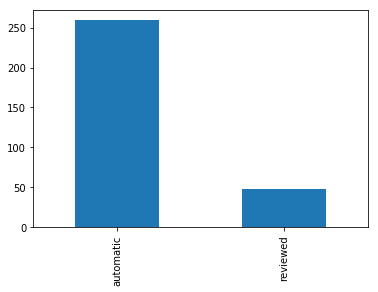

In [5]:
eq_geodf['status'].value_counts().plot(kind='bar')

In [6]:
felt_df = eq_geodf[eq_geodf['mag'] > 3]
felt_df = felt_df[['title', 'mag', 'felt']]
felt_df.dropna(inplace=True)
felt_df.sort_values(by='felt', ascending=False, inplace=True)
felt_df = felt_df[felt_df['felt'] > 5]
region = 'CA'
if region == 'Worldwide':
    felt_locations = felt_df['title'].to_list()
    felt_reports = felt_df['felt'].to_list()
    print(felt_locations)
    print(felt_reports)
else:
    felt_df = felt_df[felt_df['title'].str.contains(str(region))]
    felt_locations = felt_df['title'].to_list()
    felt_reports = felt_df['felt'].to_list()
    print(felt_locations)
    print(felt_reports)

['M 3.5 - 6km WSW of Colma, CA']
[12214.0]


In [7]:
alert_df = eq_geodf[eq_geodf['mag'] > 3]
alert_df = alert_df[['title', 'mag', 'alert']]
alert_df.dropna(inplace=True)
alert_df.sort_values(by='mag', ascending=False, inplace=True)
alert_df.head()

,title,mag,alert


In [8]:
t_df = eq_geodf[['title', 'mag', 'tsunami']].dropna()
t_df.sort_values(by='mag', ascending=False, inplace=True)
t_df = t_df[t_df['tsunami'] > 0]
t_df

,title,mag,tsunami
177,"M 5.1 - 29km NNW of Finschhafen, Papua New Guinea",5.1,1


In [19]:
sigs = eq_geodf.sort_values(by='sig', ascending=True)
sigs = sigs[['title', 'mag', 'felt', 'sig', 'geometry']]
mag_sigs = sigs[sigs['mag'] > 3]
# mag_sigs = mag_sigs[mag_sigs['sig'] > 320]
mag_sigs

,title,mag,felt,sig,geometry
206,"M 3.1 - 91km NNW of Isabela, Puerto Rico",3.05,NaN,143,POINT Z (-67.35950 19.20630 57.00000)
124,"M 3.1 - 53km N of San Antonio, Puerto Rico",3.08,NaN,146,POINT Z (-67.17960 18.99080 20.00000)
71,"M 3.4 - 273km SE of Kodiak, Alaska",3.40,NaN,178,POINT Z (-148.85620 56.28320 10.00000)
294,"M 3.5 - 55km NNW of San Antonio, Puerto Rico",3.50,NaN,188,POINT Z (-67.49730 19.31830 55.00000)
26,"M 3.5 - 29km ENE of Cantwell, Alaska",3.50,2.0,189,POINT Z (-148.38470 63.46680 0.00000)
63,"M 4.1 - 60km W of Sardinal, Costa Rica",4.10,NaN,259,POINT Z (-86.19580 10.43640 10.00000)
117,"M 4.2 - 48km W of La Ligua, Chile",4.20,7.0,274,POINT Z (-71.74770 -32.50500 58.30000)
171,"M 4.5 - 13km S of Lardos, Greece",4.50,15.0,316,POINT Z (28.01200 35.97010 74.95000)
136,"M 4.6 - 85km SSE of Pondaguitan, Philippines",4.60,NaN,326,POINT Z (126.53750 5.67790 79.24000)
302,"M 4.7 - 78km NNW of Sola, Vanuatu",4.70,NaN,340,POINT Z (167.23390 -13.24320 199.02000)
